### Install libraries

In [9]:
# Following a tutorial from 
# https://towardsdatascience.com/sentiment-analysis-on-the-tweets-about-distance-learning-with-textblob-cc73702b48bc

# !pip install pycountry
# !pip install nltk
# !pip install textblob
# !pip install wordcloud
# !pip install scikit-learn
# No need to install Pickle as it is available as part of the standard library
# !pip install pickle

In [76]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import pickle
import pickle

# Import Textblob library
from textblob import TextBlob

# Sklearn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import wordcloud
from wordcloud import WordCloud

#### Import data and examine

In [2]:
# Load the tweets data file
df = pd.read_csv('cleaned_sent_sw_lemma.csv') 

In [3]:
# Display the first 5 rows of the csv file
df.head()

,date,text
0,2016-06-21 23:34:00,mrs phillips majority telegraph coverage favou...
1,2016-06-11 02:04:00,#brexit choose street party
2,2016-06-13 13:54:00,assange #brexit
3,2016-06-07 12:40:00,people facebook fearful offend mention #euref ...
4,2016-06-10 01:07:00,"vile aggressive woman #brexit"""


In [4]:
# Check out some of the statistical information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103297 entries, 0 to 103296
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    103297 non-null  object
 1   text    103297 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [5]:
# Get tweet lengths
df["Length"] = df["text"].str.len()

In [6]:
# Get the number of words in tweets
df["Words"] = df["text"].str.split().str.len()

In [7]:
# Display the new columns
display(df[["Length", "Words"]])

,Length,Words
0,81,10
1,27,4
2,15,2
3,67,9
4,30,4
...,...,...
103292,44,7
103293,34,5
103294,56,9
103295,46,6


In [8]:
# Initialize a Tf-idf Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

In [9]:
# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform(df["text"])

# Display the matrix
display(tfidf_matrix)

<103297x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 621461 stored elements in Compressed Sparse Row format>

In [10]:
# Create a DataFrame for tf-idf vectors and display the first rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names())
display(tfidf_df.head())

,00,000,007,05,06,09,10,100,1000,10000,...,youth,youtu,youtube,yr,yup,zealand,zero,zew,zionist,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Exploration

In [11]:
# Display the first 10 rows
df.head(10)

,date,text,Length,Words
0,2016-06-21 23:34:00,mrs phillips majority telegraph coverage favou...,81,10
1,2016-06-11 02:04:00,#brexit choose street party,27,4
2,2016-06-13 13:54:00,assange #brexit,15,2
3,2016-06-07 12:40:00,people facebook fearful offend mention #euref ...,67,9
4,2016-06-10 01:07:00,"vile aggressive woman #brexit""",30,4
5,2016-06-13 20:12:00,"thank john #brexit""",19,3
6,2016-06-14 00:19:00,"brussels britain brainer #brexit #voteleave""",44,5
7,2016-06-07 14:35:00,#brexit change europe world,27,4
8,2016-06-07 14:35:00,vote leave tell friend,22,4
9,2016-06-07 14:44:00,#brexit europe,14,2


In [12]:
# Change the date field to a datetime field
df['date'] = pd.to_datetime(df['date'])

In [13]:
# Check to ensure that change has worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103297 entries, 0 to 103296
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    103297 non-null  datetime64[ns]
 1   text    103297 non-null  object        
 2   Length  103297 non-null  int64         
 3   Words   103297 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


In [14]:
# Print the minimum datetime
print("Since:",df["date"].min())
# Print the maximum datetime
print("Until",df["date"].max())

Since: 2016-02-01 07:38:00
Until 2016-06-22 01:59:00


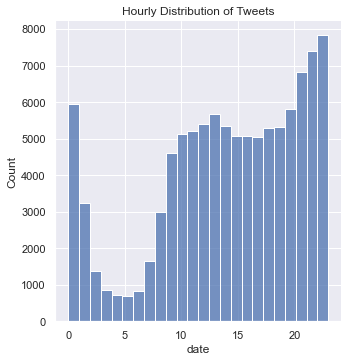

In [15]:
# Use seaborn style for histogram
sns.set()

# Plot the histogram of hours
# plt.figure(figsize=(12, 12))
sns.displot(df["date"].dt.hour, bins=24)
plt.title("Hourly Distribution of Tweets")
plt.show()

In [16]:
# Calculate polarity scores
df["Polarity"] = df["text"].apply(lambda word: TextBlob(word).sentiment.polarity)

In [17]:
# Calculate the Subjectivity scores
df["Subjectivity"] = df["text"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

In [18]:
# Display both the Subjectivity and Polarity columns
display(df[["Polarity", "Subjectivity"]].head(10))

,Polarity,Subjectivity
0,0.285714,0.535714
1,0.000000,0.000000
2,0.000000,0.000000
3,-0.900000,1.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


In [19]:
# Classify the polarities as being neutral if 0, positive if > 0 and negative if < 0
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

In [20]:
# Apply the polarity function to the polarity column
df["Polarity Scores"] = df["Polarity"].apply(analyse_polarity)

In [21]:
# Display the Polarity and Subjectivity Analysis
display(df[["Polarity Scores"]].head(10))


,Polarity Scores
0,Positive
1,Neutral
2,Neutral
3,Negative
4,Neutral
5,Neutral
6,Neutral
7,Neutral
8,Neutral
9,Neutral


In [22]:
# Count the values of the polarity column
df["Polarity Scores"].value_counts()

Neutral     63056
Positive    24066
Negative    16175
Name: Polarity Scores, dtype: int64

In [23]:
# Change the Polarity Scores column to a category
df["Polarity Scores"] = df["Polarity Scores"].astype("category")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


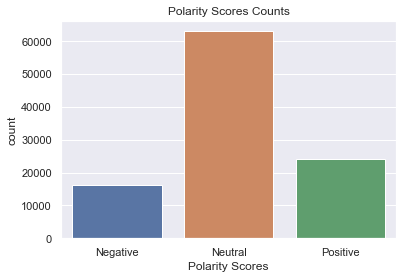

In [24]:
# Visualize the Polarity counts
sns.countplot(df["Polarity Scores"])
plt.title("Polarity Scores Counts")
plt.show()

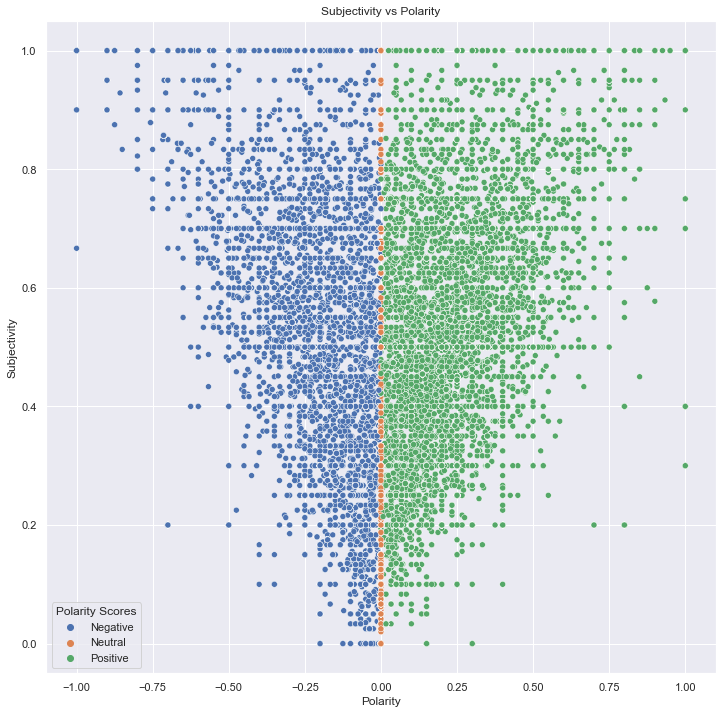

In [25]:
# Visualise the polarity scores in a scatterplot
plt.figure(figsize = (12, 12)) 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Polarity Scores", data=df)
plt.title("Subjectivity vs Polarity")
plt.show()

In [72]:
# Display the positive tweets
display(df.sort_values(by=["text","Polarity"], axis=0, ascending=False)[["text","Polarity"]].head(20))

,text,Polarity
92882,~via stratfor forbes,0.000000
93153,~political people~ britain leave european unio...,0.000000
54423,~oil price rise 50 barrel brexit move ~abebe a...,0.000000
44785,~i hopeful #brexit vote send shot bow serve li...,0.400000
94110,~far~ fight people good agree aesthetically br...,0.400000
85857,"~david cameron #quote""",0.000000
60493,"~48 hour go twitter market headline hell #brexit""",0.000000
6860,~ y'welcome #eureferendum vote ~ june 23rd tru...,0.800000
5996,~ tell happen vote leave,0.000000
3802,~ parliament sovereign #brexit vote engage gre...,0.800000


In [32]:
# Display the negative tweets
display(df.sort_values(by=["text","Polarity"], axis=0, ascending=[True, True])[["text", "Polarity"]].head(20))

,text,Polarity
80462,#039,0.000000
13503,#1 reason #brexit brexit islamist influx come ...,0.000000
80770,#1 reason vote #brexit: goldman sachs #jpmorga...,0.000000
50071,#1 reason vote #brexit: goldman sachs jpmorgan...,0.000000
31051,#1 reason vote brexit goldman sachs jpm imf se...,0.000000
85459,#1 reason vote brexit goldman sachs jpm imf se...,0.000000
79516,#1 social argument #brexit,0.033333
90069,#112000million buy lot #nhs #childsupport #roa...,0.000000
7924,#2065 #afterlife #brexit,0.000000
93648,#23rd june -either #remain surrender ceremony ...,0.000000


In [33]:
# Make a word cloud
def make_wordcloud(data, label):

    # Initialize a Tf-idf Vectorizer
    polarity_vectorizer = TfidfVectorizer(max_features=5000)

    # Fit and transform the vectorizer
    tfidf_matrix_polarity = polarity_vectorizer.fit_transform(data["text"])

    # Create a new DataFrame called frequencies
    frequencies_polarity = pd.DataFrame(tfidf_matrix_polarity.sum(axis=0).T,index=polarity_vectorizer.get_feature_names(),columns=['total frequency'])

    # Sort the words by frequency
    frequencies_polarity.sort_values(by='total frequency',ascending=False, inplace=True)

    # Join the indexes
    frequent_words_polarity = " ".join(frequencies_polarity.index)+" "

    # Initialize the word cloud
    wc = WordCloud(width = 500, height = 500, min_font_size = 10, max_words=2000, background_color ='white')

    # Generate the world clouds for each type of label
    tweets_polarity = wc.generate(frequent_words_polarity)

    # Plot the world cloud                     
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(tweets_polarity) 
    plt.axis("off") 
    plt.title("Common words in the " + label +" tweets")
    plt.tight_layout(pad = 0) 
    plt.show() 

In [34]:
# Create DataFrames for each label
positive_popular_df = df.sort_values(by=["Polarity"], axis=0, ascending=[False])[["Polarity","text"]].head(100)
negative_popular_df = df.sort_values(by=["Polarity"], axis=0, ascending=[True])[["Polarity","text"]].head(100)


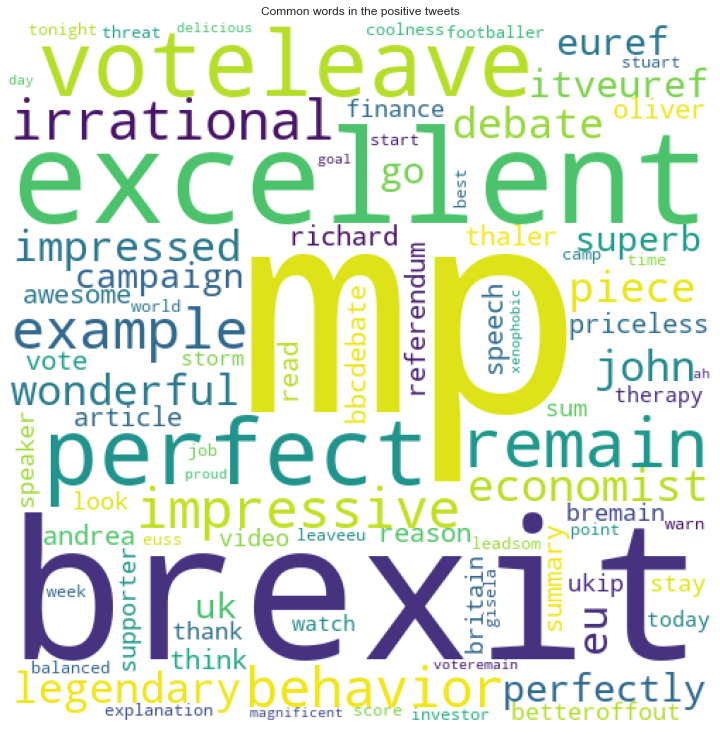

In [35]:
# Call the function
make_wordcloud(positive_popular_df, "positive")

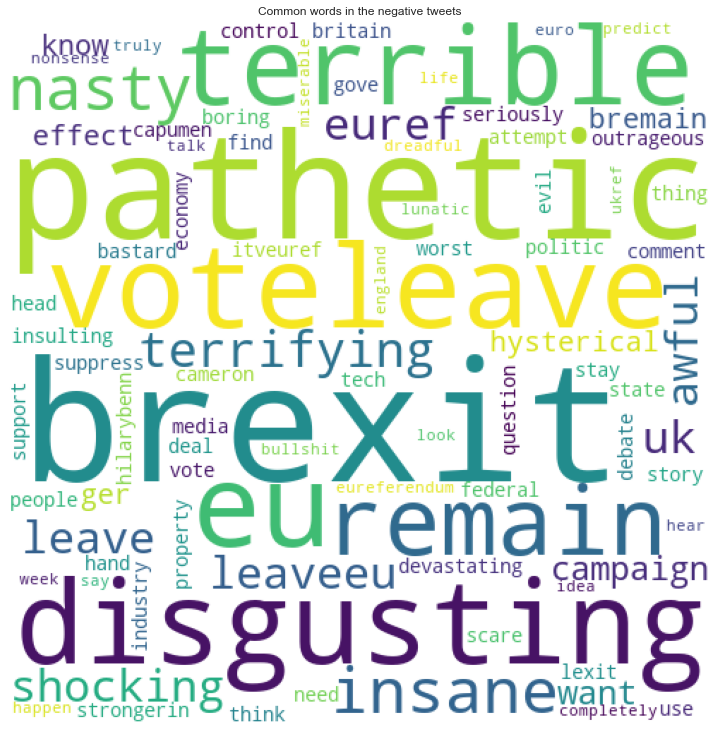

In [36]:
# Create a negative word cloud
make_wordcloud(negative_popular_df, "negative")

In [37]:
# Rename polarity scores column
df = df.rename(columns={'Polarity Scores': 'Label'})

### Build a model
#### Using Multinomial Naive Bayes Classifier

In [40]:
# Encode Labels
le = LabelEncoder()
df["Label_enc"] = le.fit_transform(df["Label"])

# Display the encoded labels
display(df[["Label_enc"]].head())

# Select the features and the target
X = df['text']
y = df["Label_enc"]

,Label_enc
0,2
1,1
2,1
3,0
4,1


####  Using a test train split 0f 90/10

In [110]:
# Test and train data

# This can be done a few different times with different sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [111]:
# Build the model

# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.8499515972894482


##### Using a test train split 0f 80/20

In [114]:
# Test and train data

# This can be done a few different times with different sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [115]:
# Build the model

# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.9056147144240078


##### Using a test train split 0f 70/30

In [116]:
# Test and train data
# This can be done a few different times with different sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [117]:
# Build the model

# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.9299774120684091


##### Using a test train split 0f 60/40

In [57]:
# Test and train data
# This can be done a few different times with different sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=34, stratify=y)

In [58]:
# Build the model

# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.936350435624395


In [63]:
# Predict the labels
y_pred = nb.predict(tfidf_test)

In [64]:
# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

Confusion Matrix

[[ 5528   434   508]
 [  311 24510   402]
 [  333   392  8901]]


In [67]:
# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      6470
           1       0.97      0.97      0.97     25223
           2       0.91      0.92      0.92      9626

    accuracy                           0.94     41319
   macro avg       0.92      0.92      0.92     41319
weighted avg       0.94      0.94      0.94     41319

